In [36]:
import pandas as pd
import os
from sklearn.model_selection import train_test_split
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix

In [37]:
# Encontra diretorio atual
atual_dir = os.getcwd()

# Acessa arquivo pkl das noticias
parent_dir = os.path.split(atual_dir)

parent_dir = os.path.split(parent_dir[0])

parent_dir = os.path.split(parent_dir[0])

caminho_csv = os.path.join(parent_dir[0], "Pre-processamento\\noticias_dados_limpos.csv")

# Carregar dataframe salvo em formato pickle
df = pd.read_csv(caminho_csv)

df.head()

,Texto,Categoria
0,O Podemos decidiu expulsar o deputado federal ...,Real
1,"Bolsonaro é um liberal completo, diz president...",Real
2,Ministro do STF libera Andrea Neves de prisão ...,Real
3,"Apesar da abundância, cresce preocupação com p...",Real
4,"Por que Harvard e MIT levarão Dilma, Moro e Su...",Real


In [38]:
# Aplicação do LabelEncoder para transformar a variável categórica 'Categoria' em uma variável numérica 'label'.

le = LabelEncoder()

df['label'] = le.fit_transform(df['Categoria'])

df['Categoria'].unique(), df['label'].unique()

df.head()

,Texto,Categoria,label
0,O Podemos decidiu expulsar o deputado federal ...,Real,1
1,"Bolsonaro é um liberal completo, diz president...",Real,1
2,Ministro do STF libera Andrea Neves de prisão ...,Real,1
3,"Apesar da abundância, cresce preocupação com p...",Real,1
4,"Por que Harvard e MIT levarão Dilma, Moro e Su...",Real,1


In [39]:
# Divide os dados em um conjunto de treino (70%) e um conjunto temporário (30%)
X_train, X_temp, y_train, y_temp = train_test_split(df['Texto'], df['label'], test_size=0.3, random_state=42)

# Divide o conjunto temporário em conjuntos de validação (15%) e teste (15%)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)  

In [40]:
# Aplica TF-IDF
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_val_tfidf = vectorizer.transform(X_val)
X_test_tfidf = vectorizer.transform(X_test)

In [41]:
# Treina o modelo de Regressão Logística
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)

LogisticRegression()

In [42]:
# Valida o modelo
y_val_pred = model.predict(X_val_tfidf)
print("Acurácia validação")
print(classification_report(y_val, y_val_pred))

Acurácia validação
              precision    recall  f1-score   support

           0       0.89      0.91      0.90      1754
           1       0.90      0.88      0.89      1589

    accuracy                           0.89      3343
   macro avg       0.89      0.89      0.89      3343
weighted avg       0.89      0.89      0.89      3343



In [43]:
# Testa o modelo
y_test_pred = model.predict(X_test_tfidf)
print("Acurácia teste")
print(classification_report(y_test, y_test_pred))

Acurácia teste
              precision    recall  f1-score   support

           0       0.86      0.91      0.88      1636
           1       0.91      0.85      0.88      1707

    accuracy                           0.88      3343
   macro avg       0.88      0.88      0.88      3343
weighted avg       0.88      0.88      0.88      3343



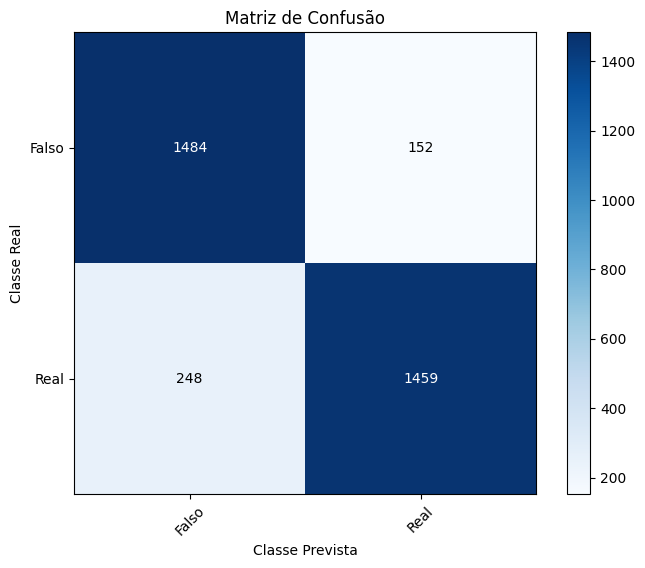

In [45]:
# Calcula a matriz de confusão
conf_mat = confusion_matrix(y_test, y_test_pred)

# Cria um objeto LabelEncoder e transforma os rótulos em variáveis categóricas
le = LabelEncoder()
df['label'] = le.fit_transform(df['Categoria'])

# Obtém os nomes das classes
nomes_classes = le.classes_

# Define o tamanho da figura
plt.figure(figsize=(8, 6))

# Define mapa de cores
cmap = plt.cm.Blues

# Plota matriz de confusão
plt.imshow(conf_mat, cmap=cmap)
plt.colorbar()

# Adiciona rótulos à matriz
plt.xticks(np.arange(len(nomes_classes)), nomes_classes, rotation=45)
plt.yticks(np.arange(len(nomes_classes)), nomes_classes)

# Adiciona valores à matriz
for i in range(conf_mat.shape[0]):
    for j in range(conf_mat.shape[1]):
        plt.text(j, i, str(conf_mat[i, j]), ha='center', va='center',
                 color='white' if conf_mat[i, j] > np.max(conf_mat) / 2 else 'black')

# Adiciona rótulos dos eixos
plt.xlabel('Classe Prevista')
plt.ylabel('Classe Real')

# Mostra o plot
plt.title('Matriz de Confusão')
plt.show()


In [46]:
# Salva o vetorizador em um arquivo
with open('vetorizador.pkl', 'wb') as file:
    pickle.dump(vectorizer, file)

# Salva o modelo em um arquivo
with open('regressao_logistica_model.pkl', 'wb') as file:
    pickle.dump(model, file)

# Salva o dataset teste em um arquivo
with open('X_test_RegressaoLogistica.pkl', 'wb') as file:
    pickle.dump(X_test, file)

with open('Y_test_RegressaoLogistica.pkl', 'wb') as file:
    pickle.dump(y_test, file)